In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.metrics import confusion_matrix

# Splitting into Train and Test

In [27]:
df_all = pd.read_csv("../data/preprocessed/data.csv")

In [28]:
from sklearn.model_selection import train_test_split

X = df_all["lemmatized"].apply(" ".join)   # Data
y = df_all["rating"]                       # Labels

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=df_all["category"]
)

# Vectorizing

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

def my_tokenizer(text):
    return text

tfidf = TfidfVectorizer(
    lowercase=False,        
    tokenizer=my_tokenizer, 
    token_pattern=None,
    ngram_range=(1,5), 
    max_features=15000,
    min_df = 5,
    max_df = 0.95
)

In [30]:
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

In [31]:
print(type(y_train))
print(y_train.shape)
print(type(X_train_vec))
print(X_train_vec.shape)

<class 'pandas.core.series.Series'>
(85031,)
<class 'scipy.sparse._csr.csr_matrix'>
(85031, 14935)


In [32]:
print(type(y_test))
print(y_test.shape)
print(type(X_test_vec))
print(X_test_vec.shape)

<class 'pandas.core.series.Series'>
(21258,)
<class 'scipy.sparse._csr.csr_matrix'>
(21258, 14935)


# Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

logreg = LogisticRegression(
    C=0.1, 
    class_weight='balanced',
    max_iter=1000,
    solver="saga"
)
logreg.fit(X_train, y_train)
lr_pred = logreg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, lr_pred))   
print("\nClassification Report:")
print(classification_report(y_test, lr_pred))  

Accuracy: 0.5296829428920877

Classification Report:
              precision    recall  f1-score   support

           1       0.56      0.67      0.61      4376
           2       0.45      0.37      0.40      4426
           3       0.45      0.40      0.43      4223
           4       0.50      0.49      0.49      4099
           5       0.65      0.73      0.69      4134

    accuracy                           0.53     21258
   macro avg       0.52      0.53      0.52     21258
weighted avg       0.52      0.53      0.52     21258



# Naive Bayes

In [34]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

nb_model = MultinomialNB(
    class_prior=None, 
    alpha = 1
)
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, nb_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, nb_pred))

Accuracy: 0.5030

Classification Report:
              precision    recall  f1-score   support

           1       0.55      0.58      0.56      4376
           2       0.41      0.40      0.41      4426
           3       0.41      0.45      0.43      4223
           4       0.50      0.41      0.45      4099
           5       0.65      0.68      0.66      4134

    accuracy                           0.50     21258
   macro avg       0.50      0.50      0.50     21258
weighted avg       0.50      0.50      0.50     21258



In [35]:
def plot_confusion_matrix(y_true, y_pred, title, ax):
    cm = confusion_matrix(y_true, y_pred)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=[1, 2, 3, 4, 5], 
                yticklabels=[1, 2, 3, 4, 5])
    
    ax.set_title(title)
    ax.set_ylabel('True (Stars)')
    ax.set_xlabel('Prediction (Stars)')

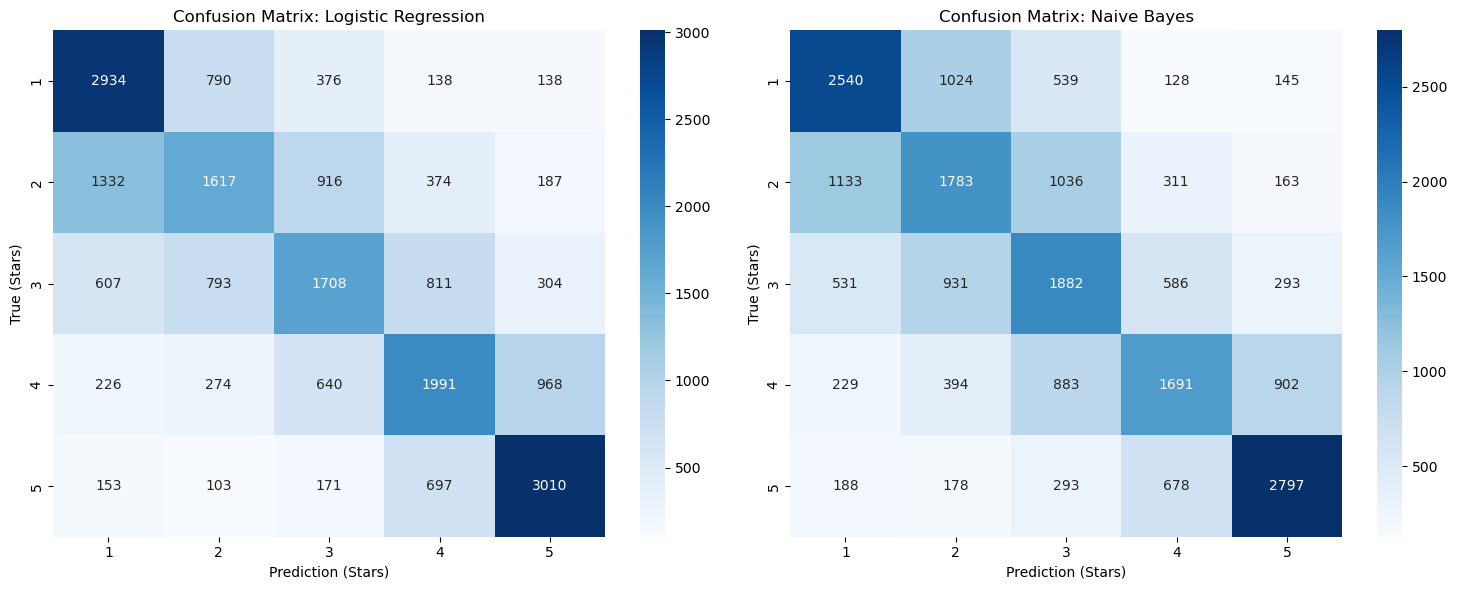

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

plot_confusion_matrix(y_test, lr_pred, "Confusion Matrix: Logistic Regression", ax1)
plot_confusion_matrix(y_test, nb_pred, "Confusion Matrix: Naive Bayes", ax2)

plt.tight_layout()
plt.show()